In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00
time: 526 µs (started: 2024-03-04 04:20:52 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
time: 16.6 s (started: 2024-03-04 04:20:58 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 897 µs (started: 2024-03-04 04:21:33 +00:00)


**Dataset columns and definition:**

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", header = "infer")
data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


time: 286 ms (started: 2024-03-04 04:21:34 +00:00)


In [ ]:
data.shape
data["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

time: 9.22 ms (started: 2024-03-04 04:21:34 +00:00)


<ipython-input-7-5e511bd288d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['stroke'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-7-5e511bd288d0>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['stroke'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


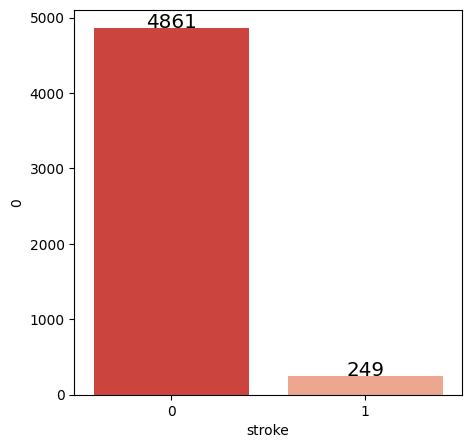

time: 485 ms (started: 2024-03-04 04:21:34 +00:00)


In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('stroke').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group["stroke"].argsort().argsort()
g = sns.barplot(x = target_group['stroke'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['stroke'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

## **DROPPING COLUMNS/MISSING VALUES**

In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

No. of missing values: 
	id: 0
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	ever_married: 0
	work_type: 0
	Residence_type: 0
	avg_glucose_level: 0
	bmi: 201
	smoking_status: 0
	stroke: 0
time: 12 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
columns_to_drop = ['id', 'Residence_type', 'work_type','ever_married']
data = data.drop(columns_to_drop,axis=1)
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


time: 41.5 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
data = data.replace('Unknown',np.NaN)

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	avg_glucose_level: 0
	bmi: 201
	smoking_status: 1544
	stroke: 0
time: 12.5 ms (started: 2024-03-04 04:21:35 +00:00)


## **replacing null missing values**

In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data['avg_glucose_level'] = data['avg_glucose_level'].fillna(data['avg_glucose_level'].median())


time: 4.66 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
mode_value = data['smoking_status'].mode()[0]
data['smoking_status'].fillna(mode_value, inplace=True)

# Drop rows with remaining missing values
data.dropna(inplace=True)

time: 8.43 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	avg_glucose_level: 0
	bmi: 0
	smoking_status: 0
	stroke: 0
time: 4.29 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,28.1,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


time: 34.3 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
data['stroke'] = ['Stroke' if i == 1 else 'Normal' for i in data['stroke']]

time: 6.39 ms (started: 2024-03-04 04:21:35 +00:00)


# **DUPLICATED**

In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

print('Duplicated rows before discarding = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Duplicated rows after discarding = %d' % (data.shape[0]))

No. of duplicated rows: 0
Duplicated rows before discarding = 5110
Duplicated rows after discarding = 5110
time: 14.4 ms (started: 2024-03-04 04:21:35 +00:00)


# **USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

time: 573 ms (started: 2024-03-04 04:21:35 +00:00)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original DataFrame with categorical variables
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender','smoking_status']

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())


    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6  Stroke   
1  61.0             0              0             202.21  28.1  Stroke   
2  80.0             0              1             105.92  32.5  Stroke   
3  49.0             0              0             171.23  34.4  Stroke   
4  79.0             1              0             174.12  24.0  Stroke   

   gender_Female  gender_Male  gender_Other  smoking_status_formerly smoked  \
0              0            1             0                               1   
1              1            0             0                               0   
2              0            1             0                               0   
3              1            0             0                               0   
4              1            0             0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0

In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Standardizing/Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)
print(pd.DataFrame(precision_recall))

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)

pd.DataFrame(precision_recall)


               Normal     Stroke  accuracy    macro avg  weighted avg
precision    0.951595   0.159292  0.863992     0.555444      0.903530
recall       0.901042   0.290323  0.863992     0.595682      0.863992
f1-score     0.925629   0.205714  0.863992     0.565671      0.881955
support    960.000000  62.000000  0.863992  1022.000000   1022.000000
Accuracy rf: 0.8639921722113503


,Normal,Stroke,accuracy,macro avg,weighted avg
precision,0.951595,0.159292,0.863992,0.555444,0.903530
recall,0.901042,0.290323,0.863992,0.595682,0.863992
f1-score,0.925629,0.205714,0.863992,0.565671,0.881955
support,960.000000,62.000000,0.863992,1022.000000,1022.000000


time: 1.21 s (started: 2024-03-04 04:21:36 +00:00)


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical labels to numeric values
y_train_bal_encoded = label_encoder.fit_transform(y_train_bal)

# Count the occurrences of each class in y_train_bal_encoded
class_counts = np.bincount(y_train_bal_encoded)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 3901 samples
Class 1: 3901 samples
time: 3.3 ms (started: 2024-03-04 04:21:37 +00:00)


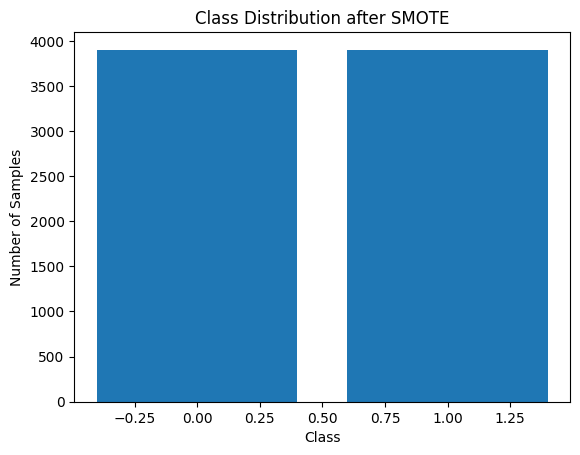

time: 278 ms (started: 2024-03-04 04:21:37 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[865  95]
 [ 44  18]]
time: 16.4 ms (started: 2024-03-04 04:21:37 +00:00)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy svm: 0.7397260273972602

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.74      0.84       960
      Stroke       0.16      0.77      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022

time: 2.82 s (started: 2024-03-04 04:21:37 +00:00)


In [ ]:
# Assuming your input data is stored in a numpy array called 'X'
num_features = X.shape[1]  # Number of columns in the array
print("Number of features:", num_features)


Number of features: 11
time: 2.3 ms (started: 2024-03-04 04:21:40 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'], axis=1)
y = data_encoded['stroke']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn * 100

print("dnn smote test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
244/244 [==============================] - 2s 3ms/step - loss: 0.4928 - accuracy: 0.7729 - val_loss: 0.5611 - val_accuracy: 0.7104
Epoch 2/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8071 - val_loss: 0.5491 - val_accuracy: 0.7125
Epoch 3/10
244/244 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8143 - val_loss: 0.5565 - val_accuracy: 0.7281
Epoch 4/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8197 - val_loss: 0.5311 - val_accuracy: 0.7521
Epoch 5/10
244/244 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8263 - val_loss: 0.6379 - val_accuracy: 0.6979
Epoch 6/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8336 - val_loss: 0.6231 - val_accuracy: 0.7198
Epoch 7/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8372 - val_loss: 0.6859 - val_accuracy: 0.7083
Epoch 

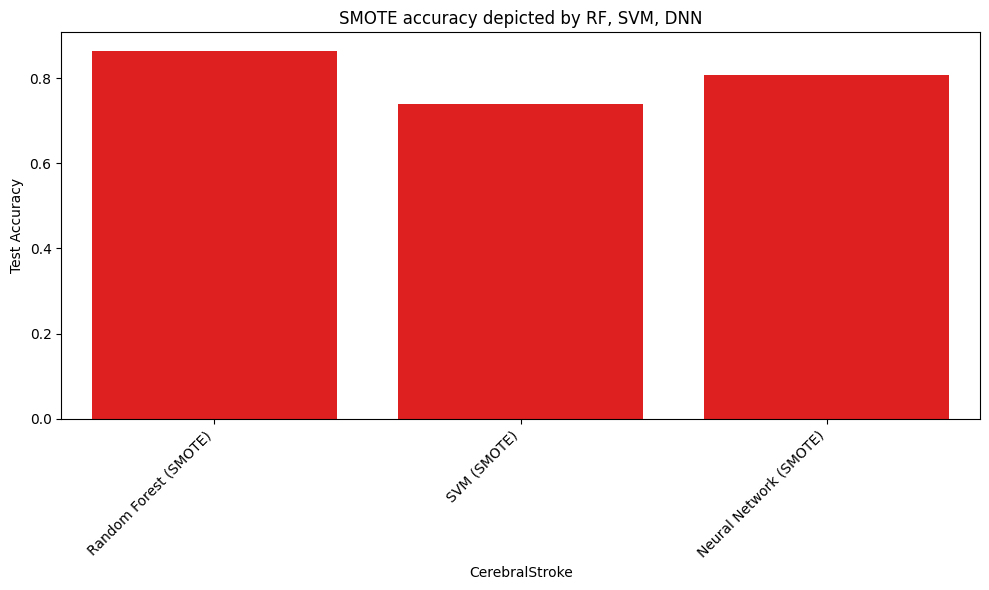

time: 286 ms (started: 2024-03-04 04:21:57 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='red')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**






In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())



Class distribution before ADASYN:
Normal    3901
Stroke     187
Name: stroke, dtype: int64
Class distribution after ADASYN:
Normal    3901
Stroke    3843
Name: stroke, dtype: int64
time: 43.5 ms (started: 2024-03-04 04:21:57 +00:00)


In [ ]:
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.8669275929549902


,Normal,Stroke,accuracy,macro avg,weighted avg
precision,0.951754,0.163636,0.866928,0.557695,0.903943
recall,0.904167,0.290323,0.866928,0.597245,0.866928
f1-score,0.927350,0.209302,0.866928,0.568326,0.883790
support,960.000000,62.000000,0.866928,1022.000000,1022.000000


time: 1.14 s (started: 2024-03-04 04:21:57 +00:00)


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the SVM model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)


Accuracy: 0.7328767123287672

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.73      0.84       960
      Stroke       0.16      0.77      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022

time: 2.85 s (started: 2024-03-04 04:21:58 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'], axis=1)
y = data_encoded['stroke']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))
# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)
test_accuracy_percentage = accuracy_dnn_adasyn * 100

print("dnn adaysn test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
244/244 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.7683 - val_loss: 0.5069 - val_accuracy: 0.7500
Epoch 2/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8053 - val_loss: 0.5445 - val_accuracy: 0.7021
Epoch 3/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8144 - val_loss: 0.5252 - val_accuracy: 0.7406
Epoch 4/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8208 - val_loss: 0.5723 - val_accuracy: 0.7240
Epoch 5/10
244/244 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8239 - val_loss: 0.5559 - val_accuracy: 0.7406
Epoch 6/10
244/244 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8324 - val_loss: 0.6177 - val_accuracy: 0.7240
Epoch 7/10
244/244 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8384 - val_loss: 0.6801 - val_accuracy: 0.7021
Epoch 

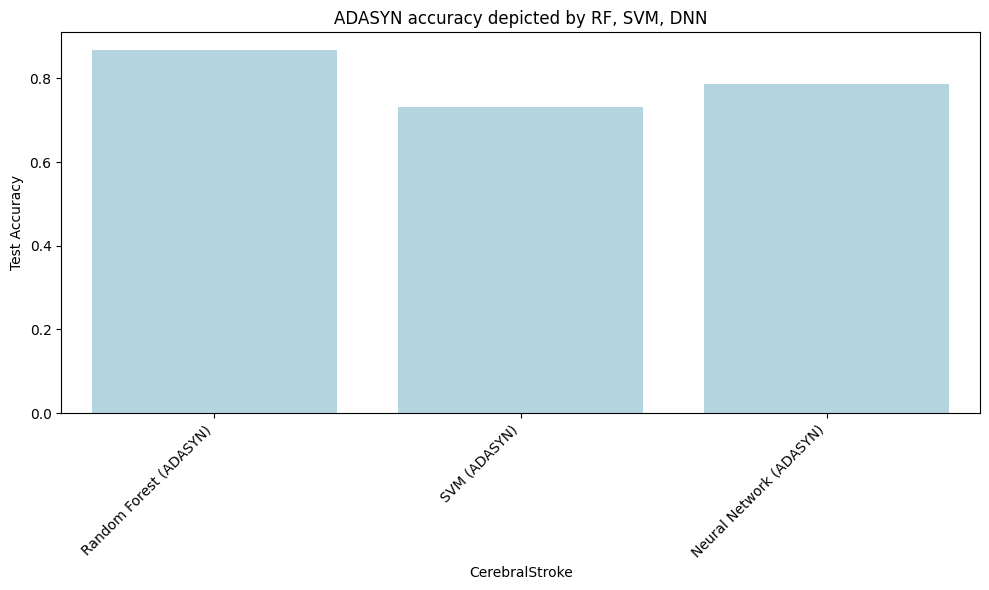

time: 286 ms (started: 2024-03-04 04:22:13 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
Normal    3901
Stroke    3901
Name: stroke, dtype: int64
time: 20 ms (started: 2024-03-04 04:22:13 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_oversampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random oversampling :", accuracy_rf_random_oversampling)

pd.DataFrame(precision_recall)

Accuracy rf random oversampling : 0.923679060665362


,Normal,Stroke,accuracy,macro avg,weighted avg
precision,0.945455,0.250000,0.923679,0.597727,0.903265
recall,0.975000,0.129032,0.923679,0.552016,0.923679
f1-score,0.960000,0.170213,0.923679,0.565106,0.912087
support,480.000000,31.000000,0.923679,511.000000,511.000000


time: 696 ms (started: 2024-03-04 04:22:13 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_oversampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random oversampling :", accuracy_svm_random_oversampling)
print("\nClassification Report:\n", report)

Accuracy svm random oversampling : 0.7553816046966731

Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.75      0.85       480
      Stroke       0.18      0.84      0.29        31

    accuracy                           0.76       511
   macro avg       0.58      0.79      0.57       511
weighted avg       0.94      0.76      0.82       511

time: 3.19 s (started: 2024-03-04 04:22:14 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'], axis=1)
y = data_encoded['stroke']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn_random_oversampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_oversampling * 100

print("dnn random oversampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
244/244 [==============================] - 2s 4ms/step - loss: 0.4776 - accuracy: 0.7861 - val_loss: 0.5962 - val_accuracy: 0.6896
Epoch 2/10
244/244 [==============================] - 1s 4ms/step - loss: 0.4233 - accuracy: 0.8131 - val_loss: 0.6534 - val_accuracy: 0.6906
Epoch 3/10
244/244 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8202 - val_loss: 0.6973 - val_accuracy: 0.6667
Epoch 4/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8241 - val_loss: 0.7467 - val_accuracy: 0.6510
Epoch 5/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8315 - val_loss: 0.8181 - val_accuracy: 0.6531
Epoch 6/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8363 - val_loss: 0.9319 - val_accuracy: 0.6208
Epoch 7/10
244/244 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8423 - val_loss: 0.8511 - val_accuracy: 0.6490
Epoch 

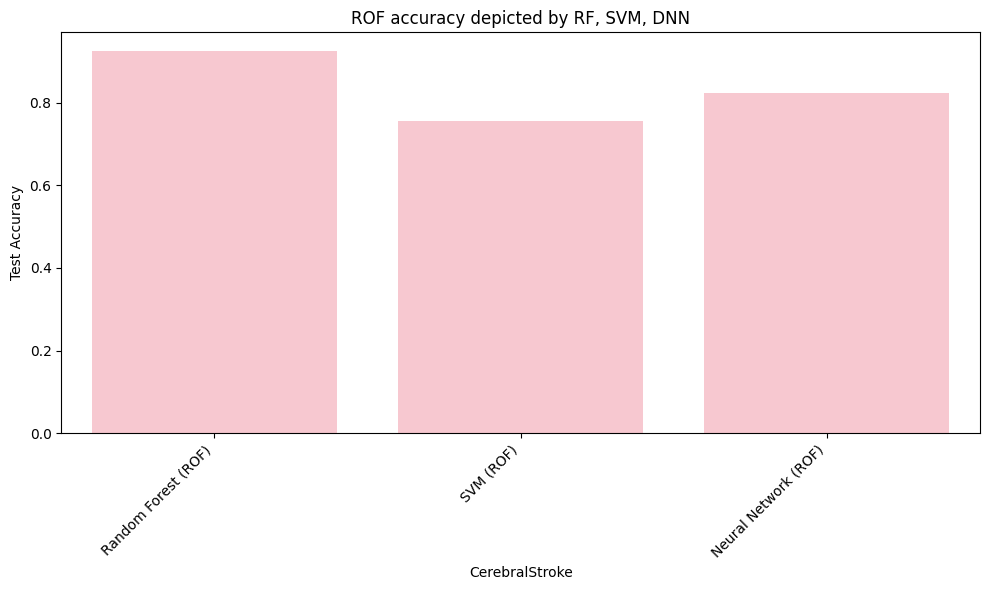

time: 310 ms (started: 2024-03-04 04:22:25 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_random_oversampling,
    'SVM (ROF)': accuracy_svm_random_oversampling,
    'Neural Network (ROF)': accuracy_dnn_random_oversampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
Normal    187
Stroke    187
Name: stroke, dtype: int64
time: 23.3 ms (started: 2024-03-04 04:22:25 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_undersampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random undersampling:",accuracy_rf_random_undersampling)

pd.DataFrame(precision_recall)

Accuracy rf random undersampling: 0.7240704500978473


,Normal,Stroke,accuracy,macro avg,weighted avg
precision,0.974790,0.142857,0.72407,0.558824,0.924320
recall,0.725000,0.709677,0.72407,0.717339,0.724070
f1-score,0.831541,0.237838,0.72407,0.534690,0.795524
support,480.000000,31.000000,0.72407,511.000000,511.000000


time: 230 ms (started: 2024-03-04 04:22:25 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_undersampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random undersampling:", accuracy_svm_random_undersampling)
print("\nClassification Report:\n", report)

Accuracy svm random undersampling: 0.7592954990215264

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.76      0.86       480
      Stroke       0.18      0.81      0.29        31

    accuracy                           0.76       511
   macro avg       0.58      0.78      0.57       511
weighted avg       0.93      0.76      0.82       511

time: 37.4 ms (started: 2024-03-04 04:22:25 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'], axis=1)
y = data_encoded['stroke']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))


# Evaluate the model on the test set
loss, accuracy_dnn_random_undersampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_undersampling * 100

print("dnn random undersampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))


Epoch 1/10
244/244 [==============================] - 1s 3ms/step - loss: 0.4871 - accuracy: 0.7794 - val_loss: 0.5438 - val_accuracy: 0.6935
Epoch 2/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8071 - val_loss: 0.4823 - val_accuracy: 0.7903
Epoch 3/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8191 - val_loss: 0.6032 - val_accuracy: 0.7258
Epoch 4/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8285 - val_loss: 0.6301 - val_accuracy: 0.7419
Epoch 5/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8343 - val_loss: 0.6769 - val_accuracy: 0.6935
Epoch 6/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8403 - val_loss: 0.6636 - val_accuracy: 0.7419
Epoch 7/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8467 - val_loss: 0.7690 - val_accuracy: 0.7581
Epoch 

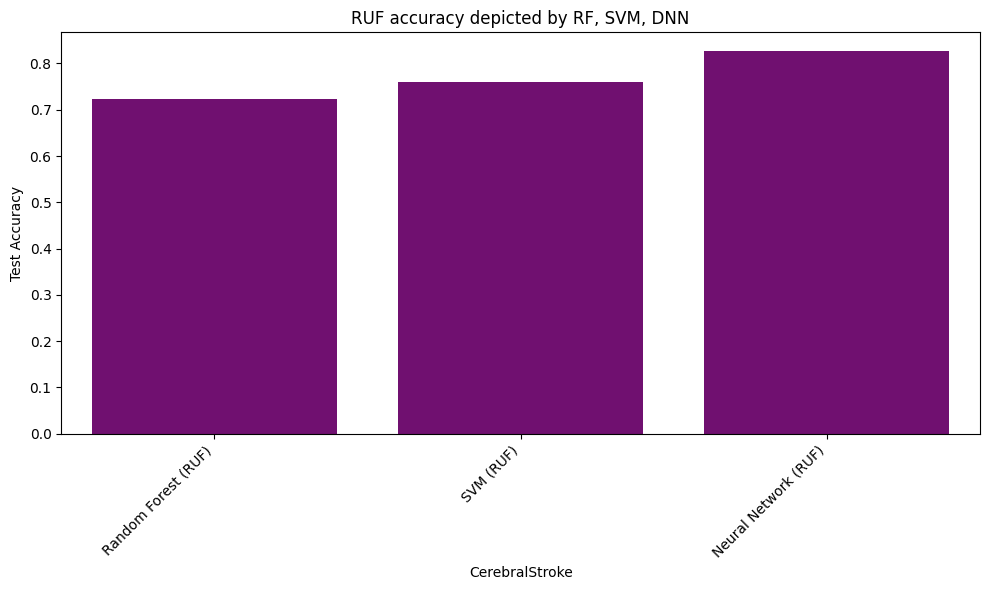

time: 327 ms (started: 2024-03-04 04:22:37 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_random_undersampling,
    'SVM (RUF)': accuracy_svm_random_undersampling,
    'Neural Network (RUF)': accuracy_dnn_random_undersampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING GAMMA DISTRIBUTION (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 'Stroke']
X_majority = X_scaled[y == 'Normal']

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
0.0    249
1.0    249
dtype: int64
time: 12.8 ms (started: 2024-03-04 04:22:37 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)
# Convert float labels in y_pred to string labels
y_pred_labels = ['Stroke' if pred == 1 else 'Normal' for pred in y_pred]


# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred_labels, output_dict=True)
accuracy_rf_gamma = accuracy_score(y_test, y_pred_labels)
print("Accuracy rf gamma:", accuracy_rf_gamma)


pd.DataFrame(precision_recall)

Accuracy rf gamma: 0.14481409001956946


,Normal,Stroke,accuracy,macro avg,weighted avg
precision,1.000000,0.066239,0.144814,0.533120,0.943353
recall,0.089583,1.000000,0.144814,0.544792,0.144814
f1-score,0.164436,0.124248,0.144814,0.144342,0.161998
support,480.000000,31.000000,0.144814,511.000000,511.000000


time: 219 ms (started: 2024-03-04 04:22:37 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Convert float labels in y_pred to string labels
y_pred_labels = ['Stroke' if pred == 1 else 'Normal' for pred in y_pred]

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print("Accuracy svm gamma:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy svm gamma: 0.5929549902152642

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.58      0.73       480
      Stroke       0.11      0.84      0.20        31

    accuracy                           0.59       511
   macro avg       0.55      0.71      0.46       511
weighted avg       0.93      0.59      0.70       511

time: 37.5 ms (started: 2024-03-04 04:22:37 +00:00)


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['stroke'], axis=1)
y = data_encoded['stroke']

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))


# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)
test_accuracy_percentage = accuracy_dnn_gamma * 100

print("Test Accuracy dnn gamma: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
244/244 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.7686 - val_loss: 0.4923 - val_accuracy: 0.7258
Epoch 2/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8067 - val_loss: 0.4891 - val_accuracy: 0.7097
Epoch 3/10
244/244 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8177 - val_loss: 0.5287 - val_accuracy: 0.7258
Epoch 4/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8276 - val_loss: 0.6109 - val_accuracy: 0.7097
Epoch 5/10
244/244 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8356 - val_loss: 0.5786 - val_accuracy: 0.7258
Epoch 6/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8417 - val_loss: 0.6264 - val_accuracy: 0.6935
Epoch 7/10
244/244 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8434 - val_loss: 0.7216 - val_accuracy: 0.6774
Epoch 

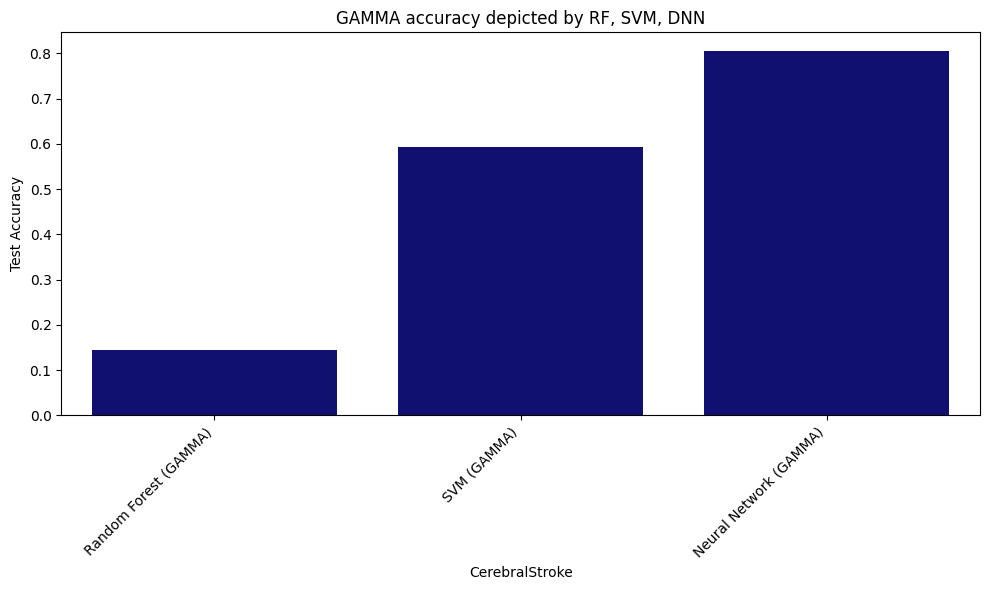

time: 303 ms (started: 2024-03-04 04:22:49 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

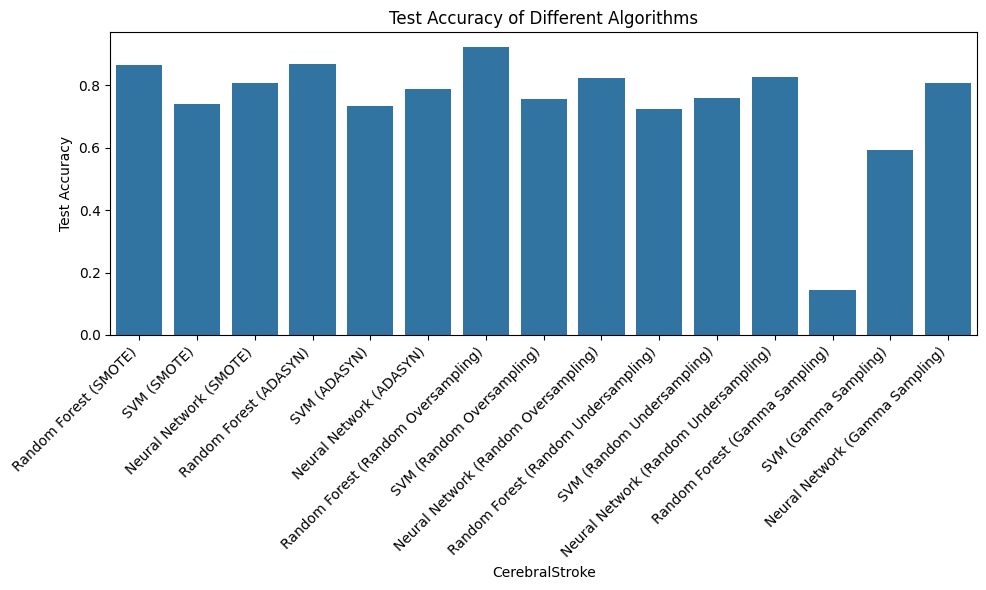

time: 413 ms (started: 2024-03-04 04:22:49 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_random_oversampling,
    'SVM (Random Oversampling)': accuracy_svm_random_oversampling,
    'Neural Network (Random Oversampling)': accuracy_dnn_random_oversampling,
    'Random Forest (Random Undersampling)': accuracy_rf_random_undersampling,
    'SVM (Random Undersampling)': accuracy_svm_random_undersampling,
    'Neural Network (Random Undersampling)': accuracy_dnn_random_undersampling,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('CerebralStroke')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_random_oversampling + accuracy_svm_random_oversampling + accuracy_svm_random_oversampling)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_random_undersampling + accuracy_svm_random_undersampling + accuracy_svm_random_undersampling)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

SMOTE avg :  80.33268181078587
adasyn avg :  79.54990146055924
ros avg :  75.53816046966732
rus avg :  75.92954990215264
gamma avg :  51.46771116499331
time: 1.62 ms (started: 2024-03-04 04:22:50 +00:00)
